# Implementing Linear Regression with Gradient Descent

## Import dependencies

In [51]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [38]:
path = "diamonds.csv"

data = pd.read_csv(path)

print(data)

r_indexs = [ random.randint(1, 53000) for i in range(150)] 

print(r_indexs)


       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7               8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8               9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9              10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   
10             11   0.30       Good     J     SI1   64.0   55.0    339  4.25   
11             12   0.23      Ideal     

In [39]:
useless_features = ['color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
for f in useless_features:
    del data[f]
    
interpolations = [list(data.loc[r]) for r in r_indexs]

In [40]:
dic = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
interpolations = [[p[0], p[1], dic[p[2]], p[3]] for p in interpolations]
print(interpolations)

[[37164, 0.32000000000000001, 5, 972], [19999, 1.5700000000000001, 3, 8538], [33870, 0.29999999999999999, 5, 844], [30368, 0.35999999999999999, 5, 729], [29927, 0.35999999999999999, 5, 713], [45174, 0.56999999999999995, 5, 1655], [45476, 0.71999999999999997, 4, 1676], [28968, 0.31, 4, 435], [26660, 2.46, 5, 16466], [30785, 0.35999999999999999, 3, 742], [35068, 0.32000000000000001, 3, 886], [15449, 1.03, 5, 6183], [21607, 1.77, 4, 9704], [49086, 0.59999999999999998, 5, 2061], [11561, 1.0900000000000001, 5, 5034], [46032, 0.56999999999999995, 4, 1728], [52478, 0.77000000000000002, 5, 2519], [51734, 0.57999999999999996, 5, 2401], [42261, 0.48999999999999999, 2, 1294], [17035, 0.90000000000000002, 2, 6804], [10950, 1.03, 5, 4900], [20926, 1.2, 4, 9139], [28041, 0.40999999999999998, 1, 659], [6196, 0.90000000000000002, 4, 3997], [12147, 1.0, 2, 5174], [40068, 0.42999999999999999, 4, 1113], [25378, 0.31, 5, 642], [6725, 0.27000000000000002, 5, 577], [9115, 1.02, 3, 4532], [46421, 0.5, 5, 176

In [49]:
# Plot a graph representation of the data in 3D
def plotGraph(features,plane):
    f1 = [p[1] for p in features]
    f2 = [p[2] for p in features]
    f3 = [p[3] for p in features]# Declaring some parameters
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(f1, f2, f3, 'r.', label='Population Data') # Plot points
    ax.legend()

    if plane != False:
        # create x,y points to be part of the hyperplane
        xx, yy = np.meshgrid(np.linspace(min(f1)-1, max(f2)+1), np.linspace(min(f2)-1, max(f2)+1))
        # calculate corresponding z for each x,y pair
        z = plane[0] + plane[1]*xx + plane[2]*yy
        # plot the surface
        ax.plot_surface(xx, yy, z, cmap=mpl.cm.coolwarm)

    plt.show()

In [45]:
# Perform Linear Regression
def run(features, it, alpha = 0.005):
    # Initialize weights of the hyperplane (aka Betas) to 0
    w = [0, 0, 0]
    p_num = len(features) # Number of points
    # Will only restart when all points have been checked
    for i in range(it):	
    # Gradient sum for each w - updated later & risk & number of points
        gradient_sum = [0, 0, 0] 
        risk = 0
        # Check all points 
        for p in features:
            # Make the prediction w/ the regression function
            f_x = w[0] + w[1]*p[1] + w[2]*p[2]
            # Build the gradients for each feature/dimension
            gradient_sum[0] += (f_x - p[3])
            gradient_sum[1] += (f_x - p[3])*p[1]
            gradient_sum[2] += (f_x - p[3])*p[2]
            # Update risk w/ squared error
            risk += (f_x - p[2])**2

        # Update betas/weights with the (gradients * learning rate) & risk
        risk *= (1/(2*p_num)) 
        w[0] -= alpha*(1/p_num)*gradient_sum[0]
        w[1] -= alpha*(1/p_num)*gradient_sum[1]
        w[2] -= alpha*(1/p_num)*gradient_sum[2]

    # Output f(x) function and the regression hyperplane
    plotGraph(features, [w[0], w[1], w[2]])

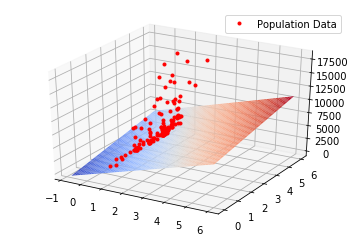

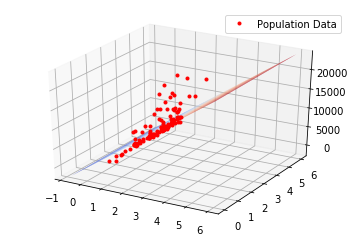

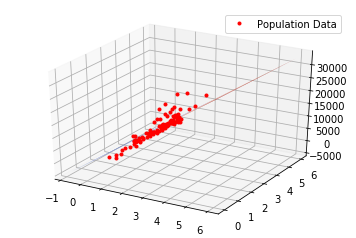

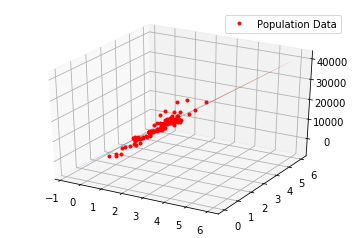

In [52]:
iterations = [100, 500, 1000, 2500]
for it in iterations:
    run(interpolations, it)

In [1]:
print(2/9)

0.2222222222222222


In [3]:
print(int(2)/int(9))

0.2222222222222222
